Producción total en 24 horas: 2206 baldosas


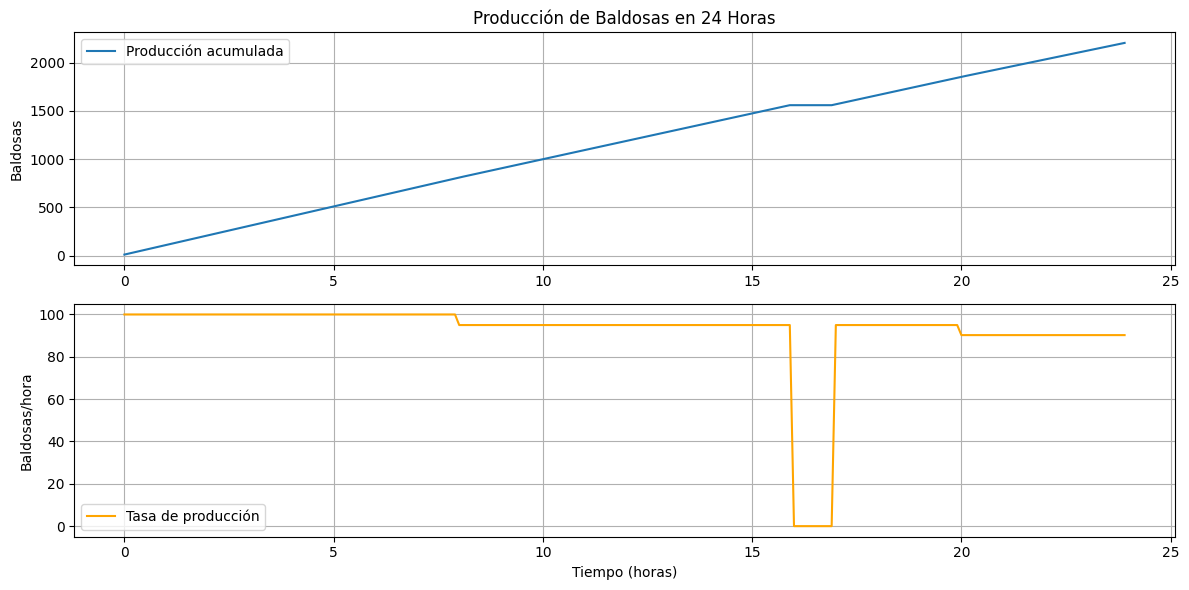

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
dt = 0.1  # paso de tiempo (horas)
T_total = 24  # duración total (horas)
t_values = np.arange(0, T_total, dt)

# Variables
Q = 0  # producción acumulada
r = 100  # tasa de producción base
estado_maquina = "ON"
eventos_discretos = [(8, "cambio_turno"), (16, "mantenimiento"), (20, "cambio_turno")]

# Almacenamiento para gráficas
produccion = []
produccion_por_hora = []
t_mantenimiento_inicio = None

for t in t_values:
    # Procesar eventos discretos
    for tiempo_evento, evento in eventos_discretos:
        if abs(t - tiempo_evento) < dt / 2:
            if evento == "cambio_turno":
                r *= 0.95  # baja eficiencia
            elif evento == "mantenimiento":
                estado_maquina = "OFF"
                r_backup = r
                r = 0
                t_mantenimiento_inicio = t

    # Reactivar tras mantenimiento de 1 hora
    if estado_maquina == "OFF" and t_mantenimiento_inicio is not None and (t - t_mantenimiento_inicio) >= 1:
        estado_maquina = "ON"
        r = r_backup
        t_mantenimiento_inicio = None

    # Producción
    if estado_maquina == "ON":
        Q += r * dt

    produccion.append(Q)
    produccion_por_hora.append(r if estado_maquina == "ON" else 0)

# Mostrar producción total
print(f"Producción total en 24 horas: {int(Q)} baldosas")

# Gráficos
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_values, produccion, label="Producción acumulada")
plt.ylabel("Baldosas")
plt.title("Producción de Baldosas en 24 Horas")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_values, produccion_por_hora, label="Tasa de producción", color="orange")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Baldosas/hora")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
